In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import zipfile
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras import regularizers
import pickle
from tensorflow.keras import Model
import random

Using TensorFlow backend.


In [2]:
def get_data(dataset, mode):
  data = {}
  
  if mode == 'train':
    path = '../data/patches'
  elif mode == 'test':
    path = '../data/patches'
  
  for fig in dataset:
    fr = fr = open(path + fig + '.txt','rb')  
    patch,label = pickle.load(fr)
    patch = patch.astype('float32') / 255
    data[fig] = (patch,label)
  return data

# combine data from different files
def buildDataset(indices, mode):
  data,label = [], []
  
  train_data_dic = get_data(indices, mode)
  
  for k in train_data_dic.keys():
    data.append(train_data_dic[k][0])
    label.append(train_data_dic[k][1])
    print("Load Data", k)
  
  return np.concatenate(tuple(data)), np.concatenate(tuple(label))

In [3]:
def shuffle(data, label):
    assert data.shape[0] == label.shape[0], 'not equal dimensition for data and label'
    num = data.shape[0]
    indices = random.sample(range(num), num)
    return data[indices,:, :, :], label[indices]

In [4]:
#test shuffle
# data = np.array([[1,1,1,1],[2,2,2,2],[3,3,3,3]])
# label = np.array([1,2,3])
# data, label = shuffle(data, label)
# print(data, label)

In [21]:
 !ls ../models

model_031.h5		      model_078.h5    model_except110091.h5
model_078_101_016_031_110.h5  model_1.h5      model_inv.h5
model_078_101_016_031.h5      model_3_101.h5  model_mob.h5


# Model

In [6]:
conv_base = InceptionV3(include_top=False, weights='imagenet')
conv_base.trainable = False

In [7]:
inputs = [tf.keras.Input(shape=(299,299,3)),tf.keras.Input(shape=(299,299,3)), \
          tf.keras.Input(shape=(299,299,3)),tf.keras.Input(shape=(299,299,3))]

layer1_conv = conv_base(inputs[0])
layer1_flatten = Flatten()(layer1_conv)
layer1_dense1 = Dense(64,activation = 'relu')(layer1_flatten)
#layer1_dense2 = Dense(32,activation = 'relu')(layer1_dense1)
layer1 = Dropout(0.4)(layer1_dense1)

layer2_conv = conv_base(inputs[1])
layer2_flatten = Flatten()(layer2_conv)
layer2_dense1 = Dense(64,activation = 'relu')(layer2_flatten)
#layer2_dense2 = Dense(32,activation = 'relu')(layer2_dense1)
layer2 = Dropout(0.4)(layer2_dense1)

layer3_conv = conv_base(inputs[2])
layer3_flatten = Flatten()(layer3_conv)
layer3_dense1 = Dense(64,activation = 'relu')(layer3_flatten)
#layer3_dense2 = Dense(32,activation = 'relu')(layer3_dense1)
layer3 = Dropout(0.4)(layer3_dense1)

layer4_conv = conv_base(inputs[3])
layer4_flatten = Flatten()(layer4_conv)
layer4_dense1 = Dense(64,activation = 'relu')(layer4_flatten)
#layer4_dense2 = Dense(32,activation = 'relu')(layer4_dense1)
layer4 = Dropout(0.4)(layer4_dense1)

merged_input = tf.concat([layer1,layer2,layer3,layer4],axis = 1)
output = tf.keras.layers.Dense(1,'sigmoid')(merged_input)
model = Model(inputs=inputs, outputs=output)

In [8]:
# optimizer = tf.keras.optimizers.RMSprop(lr=0.05, rho=0.9, epsilon=1.0, decay=0.9)
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer, loss='binary_crossentropy',metrics = ['accuracy'])

# Train

In [22]:
# all indices = ['001', '002', '005', '012', '016', '019', '023', '031',
#                '035', '057', '059', '064', '075', '078', '081', '084',
#                '091', '094', '096', '101', '110']
indices_train = ['001', '002', '005', '012', '016', '019', '023', '031',\
                 '035', '057', '059', '064', '075', '081', '084',\
                 '094', '096']
train_data, train_label = buildDataset(indices_train, 'train')

Load Data 059
Load Data 075
Load Data 002
Load Data 001
Load Data 081
Load Data 016
Load Data 094
Load Data 064
Load Data 084
Load Data 012
Load Data 035
Load Data 019
Load Data 057
Load Data 031
Load Data 096
Load Data 005
Load Data 023


In [23]:
train_data, train_label = shuffle(train_data, train_label)

In [24]:
model.load_weights("../models/model_078.h5")

In [25]:
history = model.fit(x = [train_data[:,0,:,:,:],train_data[:,1,:,:,:],train_data[:,2,:,:,:],train_data[:,3,:,:,:]], y = train_label,
                    validation_split = 0.05, 
                    batch_size= 10, epochs = 20, verbose = 1)

Train on 2152 samples, validate on 240 samples
Epoch 1/20
2152/2152 [==============================] - 50s 23ms/sample - loss: 0.4680 - accuracy: 0.8327 - val_loss: 0.3179 - val_accuracy: 0.9042
Epoch 2/20
2152/2152 [==============================] - 31s 14ms/sample - loss: 0.3141 - accuracy: 0.8717 - val_loss: 0.2149 - val_accuracy: 0.9042
Epoch 3/20
2152/2152 [==============================] - 31s 14ms/sample - loss: 0.2332 - accuracy: 0.9033 - val_loss: 0.1552 - val_accuracy: 0.9375
Epoch 4/20
2152/2152 [==============================] - 31s 14ms/sample - loss: 0.1895 - accuracy: 0.9205 - val_loss: 0.1779 - val_accuracy: 0.9500
Epoch 8/20
2152/2152 [==============================] - 31s 14ms/sample - loss: 0.1604 - accuracy: 0.9303 - val_loss: 0.1113 - val_accuracy: 0.9667
Epoch 9/20
2152/2152 [==============================] - 31s 14ms/sample - loss: 0.1621 - accuracy: 0.9401 - val_loss: 0.1378 - val_accuracy: 0.9375
Epoch 10/20
2152/2152 [==============================] - 31s 14ms

In [26]:
model.save_weights('../models/model_except110091110.h5')

# Test

In [ ]:
# 110 101 091

In [106]:
test_index = '091'
indices_test = [str(test_index)]
test_data, test_label = buildDataset(indices_test, 'test')
test_data,  test_label = shuffle(test_data, test_label)

Load Data 091


In [107]:
#model.load_weights("../models/model_except110091.h5")

In [108]:
result = model.evaluate(x = [test_data[:,0,:,:,:],test_data[:,1,:,:,:],test_data[:,2,:,:,:],test_data[:,3,:,:,:]],\
               y = test_label,\
               batch_size=10,\
               verbose=1)

188/188 [==============================] - 2s 11ms/sample - loss: 0.5293 - accuracy: 0.7819


In [109]:
pred = model.predict(x=[test_data[:,0,:,:,:],test_data[:,1,:,:,:],test_data[:,2,:,:,:],test_data[:,3,:,:,:]],\
                     batch_size=10, verbose=1)

188/188 [==============================] - 2s 11ms/sample


## ROC

In [117]:
from sklearn.metrics import roc_curve, auc

In [118]:
fpr, tpr, threshold = roc_curve(test_label, pred)
roc_auc = auc(fpr, tpr)

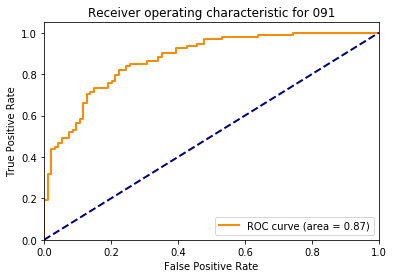

In [119]:
fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for 091')
plt.legend(loc="lower right")
plt.show()

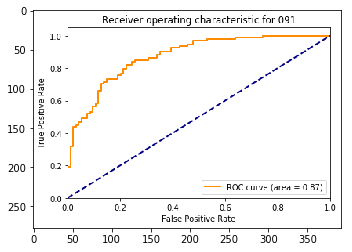

In [120]:
path = '../results/' + str(test_index) + '/' + 'ROC.png'
fig.savefig(path, bbox_inches = 'tight')
a = plt.imread(path)
plt.imshow(a)

## Confusion Matrix

In [121]:
from pandas_ml import ConfusionMatrix

In [122]:
pred = pred > 0.5

In [123]:
confusion_matrix = ConfusionMatrix(test_label.reshape(-1), pred.reshape(-1))

In [124]:
import seaborn as sns
cm = np.array([[confusion_matrix.TP, confusion_matrix.FN], [confusion_matrix.FP, confusion_matrix.TN]])
cm = cm/np.sum(cm)

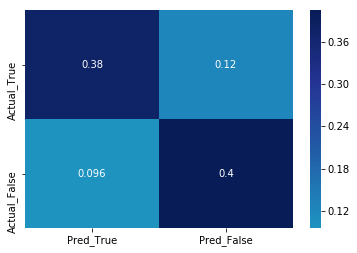

In [125]:
path = '../results/' + str(test_index) + '/' + 'cm.png'
fig = sns.heatmap(cm, center=0, annot=True, cmap="YlGnBu",  xticklabels=['Pred_True', 'Pred_False'], yticklabels=['Actual_True', 'Actual_False'])
fig.figure.savefig(path, bbox_inches='tight')
# img=plt.imread('cm.png')
# plt.imshow(img)

In [126]:
path = '../results/' + str(test_index) + '/' + 'accuracy.txt'
file = open(path,"w")
file.write(str(result[1])) 
file.close()

In [103]:
! cat path

cat: path: No such file or directory
